In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter #count 위함
from konlpy.tag import Twitter #형태소 분석과 태깅위함 konlpy가 제공하는 twitter 라이브러리

from wordcloud import WordCloud #워드클라우드 시각화
from PIL import Image


In [3]:
review = pd.read_csv('data_T_reviews.csv',encoding='cp949')

In [4]:
review.head()

,name,size,date,rate,title,text
0,[세트상품] 더블 코튼 롱 티셔츠 화이트 / L,화이트 / L,2018.06.24 23:40,50,좋아요,어커버 티셔츠 정말 좋아요.\n편하고 아주 편해요!\n색상도 좋고 사이즈도 좋아요....
1,[세트상품] 더블 코튼 롱 티셔츠 블랙 / M,블랙 / M,2018.06.24 20:59,50,좋아요,크게 입는거 좋아하는데 사이즈 좋아요
2,[세트상품] 더블 코튼 롱 티셔츠 블랙 / L,블랙 / L,2018.06.24 19:35,50,좋네요,작년에도 한세트 사고 올해도 삿어요~\n1년에 한개씩 사서 잘 입고 있어요 굿
3,[세트상품] 더블 코튼 롱 티셔츠 화이트 / L,화이트 / L,2018.06.24 14:22,50,가격대비 굳,생각보다 괜찮아요\n약간 두꺼워서 한여름에는 못입지 싶어요
4,[세트상품] 더블 코튼 롱 티셔츠 블랙 / XL,블랙 / XL,2018.06.24 14:14,50,추천,팔쪽에 마크가 생각보다 괜찮네요. 옷도 이쁜것 같습니다 추천!


In [5]:
review.rate.mean()

48.348850367779434

In [6]:
bad = review[review.rate<40]
good = review[review.rate>30]

In [7]:
print('bad reviews:',len(bad))
print('good reviews:',len(good))

bad reviews: 1522
good reviews: 37360


# 1) 코퍼스생성

In [8]:
bad_corpus = """"""
for i in range(len(bad)):
    bad_corpus+=str(bad.iloc[i,4])+' ' #title
    bad_corpus+=str(bad.iloc[i,5])+'\n' #text

In [9]:
bad_corpus[:1000]

'핫 검은색이랑 흰색 시켰는데\n\n사이즈랑 생김새가 좀 다르네요\n\n여러 공장에서 나온 반팔에 상표만 챔피온으로 바꿔 판매한게 아닌지 의심이 가네용\n솔직한 후기! 옷이 음... 조금 실망이에요\n너무 얇아서 속이 다 비치고\n그리고 사이즈가 정! 사이즈에요\n박시한걸 원하시면 한사이즈 UP 추천\n별로예요. 배송은 하루 반? 정도 걸렸구요핏은 괜찮은데 빠니까 3년 입은 것 마냥늘어났더라구요,,처음 받을때부터...\n\t\t\t\t\t\t\t\t\t\t more\n색감 좋아용 옷색감이 좋아요!!근데 너무 오버핏이라 당황스러웠네요\n솔직히.. 너무 많은 사람들이 입고다녀서 \n나가면 꼭 겹치네요\n그만큼 디자인이 이쁘다는건데\nㅠㅠ가끔입게되요\n후기 생각보다 10수도 많이 비침\n참고해서 구매하세요.\n그냥 그렇네요 옷이 어꺠부분은 넓고 몸부분은 통이 너무 좁아서 약간 언벨런스가있네요.. 조금 아쉬워요\n그냥 딱 레이어드용인듯해요\n디자인은 괜찮다고 생각해요.. 하지만 한번 빨았는데 목부분이 잘 늘어 나네요...\n재질은 별로 좋다는 느낌을 못받았습니다.\n별로예요. 배송은 하루 반? 정도 걸렸구요핏은 괜찮은데 빠니까 3년 입은 것 마냥늘어났더라구요,,처음 받을때부터...\n\t\t\t\t\t\t\t\t\t\t more\n이쁜데 늘어나는게 조금 아쉽네요 세탁하고 나니까 팔이랑 기장 끝부분이 조금씩 늘어나는게 보이네요 다림질을 해도 그래요 ㅠ 그래도 이쁘게 입고있습니다\n혹해서 삿는데 아쉬움 그냥 나염이라 생각보다 퀄리티가 아쉬운 부분입니다\n인정하는각 규장각 동의? 어보감\n기장이 조금 긴듯한데 괜찮아요 마르고 작은 사람이 입기엔 조금 아쉬워요 ㅠㅠ 몸을 더 키우던가 해야겠네요 :-(\n딱 돈값하는 싼티입니다 싼만큼 원단도 싸구려라 세탁하고나면 뻣뻣해짐이 심하고 부직포느낌이 많이납니다\n솔직히.. 너무 많은 사람들이 입고다녀서 \n나가면 꼭 겹치네요\n그만큼 디자인이 이쁘다는건데\nㅠㅠ가끔입게되요\n후기 생각보다 10수도 많이 비침\n참고해서 구매하세요.\n

In [10]:
good_corpus = """"""
for i in range(len(good)):
    good_corpus+=str(good.iloc[i,4])+' ' #title
    good_corpus+=str(good.iloc[i,5])+'\n' #text


In [11]:
good_corpus[:1000]

'좋아요 어커버 티셔츠 정말 좋아요.\n편하고 아주 편해요!\n색상도 좋고 사이즈도 좋아요.\n재질도 좋고 약간 두꺼운데 좋아요.\n이너로도 좋아요.\n좋아요 크게 입는거 좋아하는데 사이즈 좋아요\n좋네요 작년에도 한세트 사고 올해도 삿어요~\n1년에 한개씩 사서 잘 입고 있어요 굿\n가격대비 굳 생각보다 괜찮아요\n약간 두꺼워서 한여름에는 못입지 싶어요\n추천 팔쪽에 마크가 생각보다 괜찮네요. 옷도 이쁜것 같습니다 추천!\n짱짱 작년에는 흰색 검정색으로 샀는디 올래도 만족해서 그레이 흰색 샀어염 정말만족합니다\n좋아요! 저렴하면서 질높은 티셔츠 잘구매했습니다.\n무난 그냥 무난하게 피시방갈때나 5년 이상 사귄여친 만나러갈때 입으면 딱\n좋아요 언제나 어커버는 실망시키지 않는 가격과 질이 있네여\n이쁩니다 작년에도 삿었는데 작년에 매우만족해서 이번년도에 또사네요 되게이쁩니다\n좋아요~ 적당히 막입기좋은 티셔츠라, 여러장 구비해서 입고다닙니다! \n어느정도입다가 , 늘어나면잠옷으로입고 . 편하고 좋습니다!\n가성비좋은 티셔츠같아요~ 적당히 막입기좋은 티셔츠라, 여러장 구비해서 입고다닙니다! \n어느정도입다가 , 늘어나면잠옷으로입고 . 편하고 좋습니다!\n생각보다 연합니다 색이 생각보다 연해요\n수축 없습니다\n수축이 있어서 M 제품 샀는데 수축이 있어서 L 사서 빨았더니 사이즈 딱 맞네요\n살짝 크네요 애쉬 제품은 빨면 줄길래 큰거샀는데\n수축이 별로없네요\n가성비 갑 이 가격에 이렇게 멀쩡한 옷을 살 수 있다니ㅋㅋㅋ진짜 대박이예요소재 튼튼하고 좋고 색은 생각했던...\n\t\t\t\t\t\t\t\t\t\t more\n완전 좋습니다ㅎㅎ 검은색으로 두장 샀는데 사이즈도 딱맞고 옷도 튼튼하니 좋네요ㅎㅎ\n이너로 입어도 좋고 티 하나만 입고 다녀도 괜찮습니다!!\n저렴한 가격에 좋은 상품구매했네요~ㅎㅎ\n후기 역시 트리플 에이 티셔츠\n가성비 최고에요\n미국사이즈라 좀 크게나와요\n귯귯 가성비 짱짱ㅎㅎ\n이가격에 이정도 흰반팔티\n무슨 말이 필요하겠습니까ㅎㅎ\n짱 기

# 2) 토큰화/토큰 추출

In [13]:
nlp = Twitter()

In [14]:
nlp.pos(bad_corpus)[0:10] #태깅

[('핫', 'Noun'),
 ('검은색', 'Noun'),
 ('이랑', 'Josa'),
 ('흰색', 'Noun'),
 ('시켰', 'Verb'),
 ('는데', 'Eomi'),
 ('사이즈', 'Noun'),
 ('랑', 'Josa'),
 ('생김새', 'Noun'),
 ('가', 'Josa')]

In [15]:
bad_morphs = nlp.morphs(bad_corpus) #모든 품사의 형태소 추출
good_morphs = nlp.morphs(good_corpus)
bad_morphs[:10]

['핫', '검은색', '이랑', '흰색', '시켰', '는데', '사이즈', '랑', '생김새', '가']

In [16]:
bad_morphs_count = Counter(bad_morphs)
good_morphs_count = Counter(good_morphs)

In [17]:
bad_morphs_count.most_common(10)

[('이', 1396),
 ('요', 1361),
 ('에', 738),
 ('은', 652),
 ('.', 637),
 ('좋', 516),
 ('도', 498),
 ('...', 464),
 ('가', 461),
 ('네요', 458)]

In [18]:
bad_nouns = nlp.nouns(bad_corpus) # 명사만 추출
good_nouns = nlp.nouns(good_corpus)

In [19]:
bad_nouns[:10]

['핫', '검은색', '흰색', '사이즈', '생김새', '좀', '여러', '공장', '반팔', '상표']

In [20]:
good_nouns[:10]

['어', '커버', '티셔츠', '정말', '아주', '색상', '사이즈', '재질', '약간', '너']

# 3) 불용어처리/랭크

In [46]:
stopwords = ['너무','좀','생각','그냥','옷','조금','구매','제','것','때','음','거','정도','후기','배송','더','요','저','약간','진짜','정말','흠','이','자체','완전','전체','일단','뭐','그','말',
            '왜','듯','뭔가','데','듭니','매우','모디','파','이드','평소','원래','와','오','맘에듭니','부분','티','한번','다른','아주','살짝','티셔츠']

In [47]:
bad_nouns = [b for b in bad_nouns if not b in stopwords]
good_nouns = [g for g in good_nouns if not g in stopwords]

In [48]:
bad_nouns_count = Counter(bad_nouns)
good_nouns_count = Counter(good_nouns)

In [49]:
bad_nouns_count.most_common(20)

[('사이즈', 278),
 ('목', 260),
 ('핏', 212),
 ('재질', 211),
 ('가격', 193),
 ('디자인', 157),
 ('느낌', 133),
 ('별로', 124),
 ('세탁', 116),
 ('기장', 111),
 ('색감', 110),
 ('프린팅', 105),
 ('안', 94),
 ('버핏', 92),
 ('사진', 91),
 ('색', 90),
 ('어깨', 90),
 ('색상', 89),
 ('마음', 82),
 ('맘', 78)]

In [50]:
good_nouns_count.most_common(20)

[('사이즈', 9828),
 ('재질', 6181),
 ('핏', 5490),
 ('맘', 3534),
 ('색감', 3472),
 ('프린팅', 3133),
 ('가격', 3092),
 ('디자인', 3056),
 ('여름', 3048),
 ('마음', 2895),
 ('버핏', 2841),
 ('무난', 2745),
 ('색', 2435),
 ('짱', 2084),
 ('기장', 2051),
 ('느낌', 1951),
 ('굿', 1876),
 ('역시', 1814),
 ('목', 1774),
 ('색상', 1734)]

# 4) 결과시각화

(-0.5, 499.5, 514.5, -0.5)

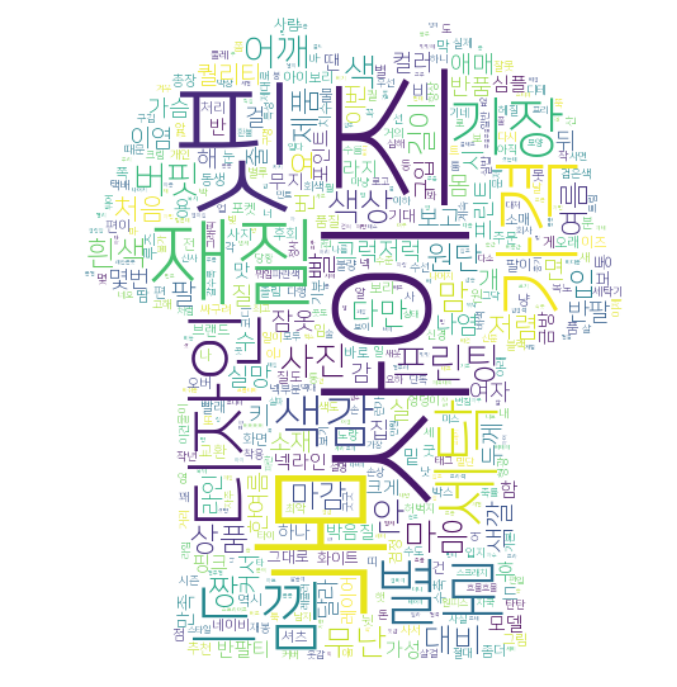

In [51]:
font_path = 'C:\\WINDOWS\\Fonts\\NanumSquareL.ttf'
T_mask=np.array(Image.open("T.png"))

badcloud = WordCloud(font_path=font_path,background_color='white',mask=T_mask,max_words=500).generate_from_frequencies(bad_nouns_count)
plt.figure(figsize=(12,12))
plt.imshow(badcloud,interpolation='bilinear')
plt.axis('off')

(-0.5, 499.5, 514.5, -0.5)

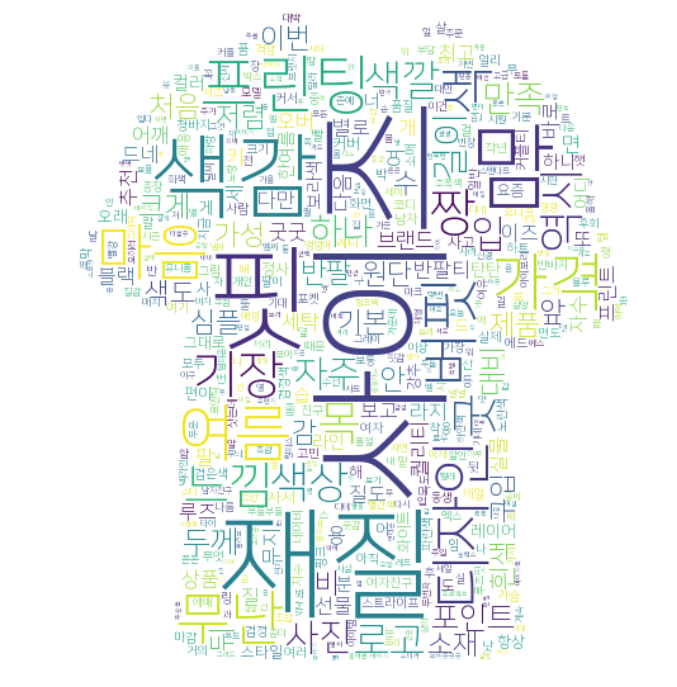

In [52]:
font_path = 'C:\\WINDOWS\\Fonts\\NanumSquareL.ttf'
T_mask=np.array(Image.open("T.png"))

goodcloud = WordCloud(font_path=font_path,background_color='white',mask=T_mask,max_words=500).generate_from_frequencies(good_nouns_count)
plt.figure(figsize=(12,12))
plt.imshow(goodcloud,interpolation='bilinear')
plt.axis('off')